# Single Neuron

In [23]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.dists import Uniform
from nengo.utils.matplotlib import rasterplot

Constructing a network with one neuron that is stimulated by a cosine signal.

In [27]:
net = nengo.Network()
with net:
    stim = nengo.Node(lambda t: np.cos(16 * t), label="Stimulus")
    single_neuron = nengo.Ensemble(n_neurons=1, dimensions=1, encoders=[[1]], label="A Single Neuron")
    nengo.Connection(stim, single_neuron)

    stim_probe = nengo.Probe(stim)
    spikes = nengo.Probe(single_neuron.neurons)
    voltage = nengo.Probe(single_neuron.neurons, "voltage")
    filtered = nengo.Probe(single_neuron, synapse=0.01)

Probes were added and now we can simulate the model.

In [28]:
t_max = 1
with nengo.Simulator(net) as sim:
    sim.run(1)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

(0.0, 1.0)

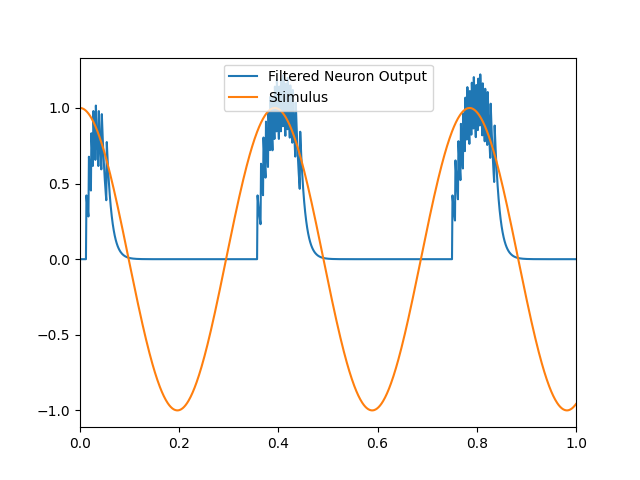

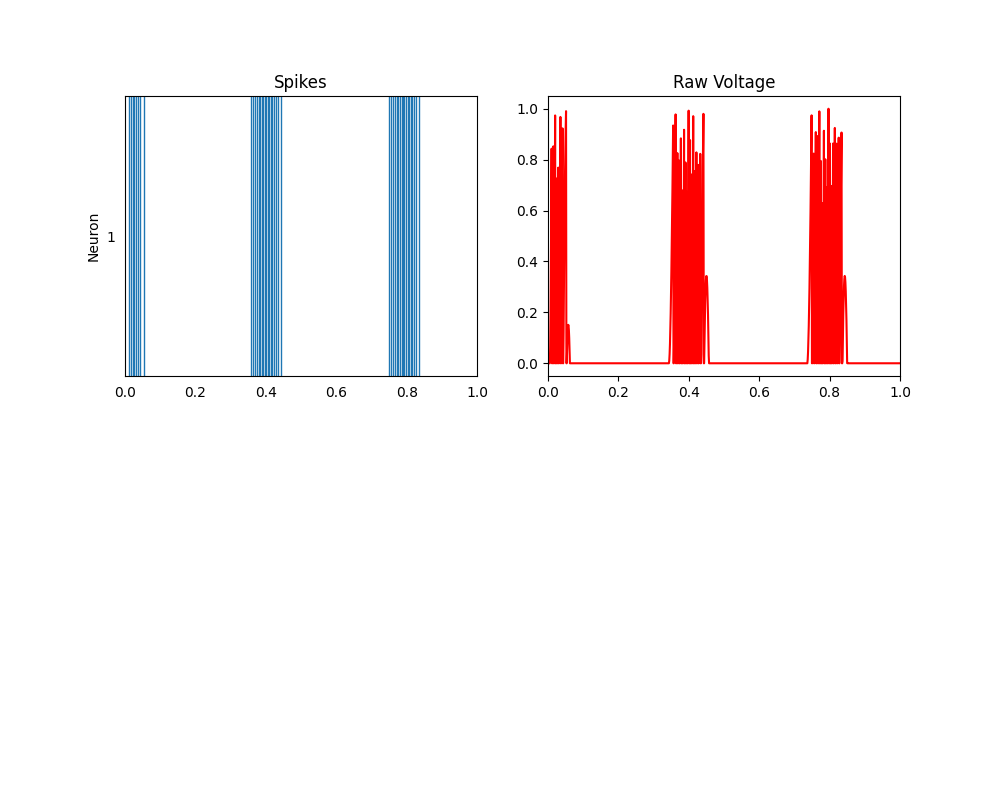

In [29]:
plt.figure()
plt.plot(sim.trange(), sim.data[filtered])
plt.plot(sim.trange(), sim.data[stim_probe])
plt.legend(["Filtered Neuron Output", "Stimulus"])
plt.xlim(0, t_max)

plt.figure(figsize=(10, 8))
plt.subplot(221)
rasterplot(sim.trange(), sim.data[spikes])
plt.ylabel("Neuron")
plt.title("Spikes")
plt.xlim(0, t_max)

plt.subplot(222)
plt.plot(sim.trange(), sim.data[voltage][:, 0], "r")
plt.title("Raw Voltage")
plt.xlim(0, t_max)

The top plot shows the input cos signal in orange and then output response. The spikes in the bottom
left trigger neurotransmitters to be released which induces the response seen. This is why there are
little spikes in the response. The bottom right then shows the soma voltages before thresholding for spikes.